---------------------------------------------------------------- Analyzing Crime Patterns in Chicago City Using Brewlytics ----------------------------------------------------

## Importing Libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
import numpy as np 
import re
import pandas as pd 
import seaborn as sns
from datetime import datetime
import time
from time import sleep
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltd

%matplotlib inline
plt.style.use('seaborn')
# import fbprophet
# print(fbprophet.__version__)
# from geopy.geocoders import Nominatim
from sklearn.cluster import AgglomerativeClustering as AC

In [2]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

### Importing Dataset

In [3]:
df = pd.read_csv("C:/Users/Rahul/Downloads/chicagodf.csv",converters={'beat{string}': convert_dtype,'district{string}': convert_dtype,'ward{integer}': convert_dtype})

In [4]:
df

,id{integer},case_number{string},date{timestamp},block{string},iucr{string},primary_type{string},description{string},location_description{string},arrest{string},domestic{string},...,JulianDate{decimal},DayOfYear{integer},DayOfWeek{integer},NamedDayOfWeek{string},NamedMonth{string},AlignedWeekOfYear{integer},UnalignedWeekOfYear{integer},location_2{point},_the_sort{serial},Distance_in_Meters{decimal}
0,10271159,HY459408,2015-10-12T22:20:00.000Z,082XX S COLES AVE,0820,THEFT,$500 AND UNDER,STREET,f,t,...,2.457309e+06,285,2,Monday,October,42,41,POINT(-87.5683491228 41.7079332906),1,4471.834400
1,10286100,HY473842,2015-10-24T00:20:00.000Z,082XX S COLES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,t,t,...,2.457320e+06,297,7,Saturday,October,43,43,POINT(-87.5683491228 41.7079332906),2,4500.483231
2,10396194,HZ132285,2016-01-29T00:40:00.000Z,082XX S COLES AVE,031B,ROBBERY,ARMED: OTHER FIREARM,SIDEWALK,f,f,...,2.457417e+06,29,6,Friday,January,4,5,POINT(-87.5683491228 41.7079332906),3,4490.764639
3,10463508,HZ202820,2016-03-27T11:45:00.000Z,082XX S COLES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,f,t,...,2.457475e+06,87,1,Sunday,March,12,13,POINT(-87.5683491228 41.7079332906),4,4494.766101
4,10475615,HZ214652,2016-03-25T20:00:00.000Z,082XX S COLES AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,f,f,...,2.457474e+06,85,6,Friday,March,12,13,POINT(-87.5683491228 41.7079332906),5,4490.764639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359635,12291796,JE140154,2021-01-24T21:00:00.000Z,001XX W MAPLE ST,0820,THEFT,$500 AND UNDER,APARTMENT,f,f,...,2.459240e+06,24,1,Sunday,January,3,4,POINT(-87.6433521393 41.9032416531),3359636,957.073447
3359636,12211365,JD420090,2020-11-04T02:17:00.000Z,011XX N CLARK ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,CTA BUS,f,f,...,2.459158e+06,309,4,Wednesday,November,45,45,POINT(-87.6433521393 41.9032416531),3359637,991.680421
3359637,10205312,HY391851,2015-08-21T21:30:00.000Z,011XX N CLARK ST,0560,ASSAULT,SIMPLE,BANK,f,f,...,2.457257e+06,233,6,Friday,August,34,34,POINT(-87.6433521393 41.9032416531),3359638,994.391062
3359638,11572736,JC124022,2019-01-21T06:55:00.000Z,011XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,f,f,...,2.458505e+06,21,2,Monday,January,4,3,POINT(-87.6433521393 41.9032416531),3359639,994.391062


### Removing Null Values

In [5]:
df=df.dropna()

### Checking for Null Values if any

In [7]:
print('Number of instances = %d\nNumber of attributes = %d' % (df.shape[0], df.shape[1]))
print('------------------------------')
df.isnull().sum()

Number of instances = 3353599
Number of attributes = 39
------------------------------


id{integer}                     0
case_number{string}             0
date{timestamp}                 0
block{string}                   0
iucr{string}                    0
primary_type{string}            0
description{string}             0
location_description{string}    0
arrest{string}                  0
domestic{string}                0
beat{integer}                   0
district{string}                0
ward{decimal}                   0
community_area{decimal}         0
fbi_code{string}                0
x_coordinate{integer}           0
y_coordinate{integer}           0
updated_on{timestamp}           0
latitude{decimal}               0
longitude{decimal}              0
location{point}                 0
Date{string}                    0
Year{integer}                   0
Month{integer}                  0
Day{integer}                    0
Hour{integer}                   0
Minute{integer}                 0
Second{integer}                 0
EpochSecond{integer}            0
JulianDate{dec

In [9]:
df.rename(columns = {'id{string}':'id','case_number{string}':'case_number','date{timestamp}':'date','block{string}':'block','iucr{string}':'iucr','primary_type{string}':'primary_type','description{string}':'description','location_description{string}':'location_description','arrest{bool}':'arrest','domestic{bool}':'domestic','beat{string}':'beat','district{string}':'district','ward{integer}':'ward','community_area{string}':'community_area','fbi_code{string}':'fbi_code','x_coordinate{string}':'x_coordinate','y_coordinate{string}':'y_coordinate','year{string}':'year_s','updated_on{timestamp}':'updated_on','latitude{decimal}':'latitude','longitude{decimal}':'longitude','location{point}':'location','Date{string}':'Date','Year{integer}':'Year','Month{integer}':'Month','Day{integer}':'Day','Hour{integer}':'Hour','Minute{integer}':'Minute','Second{integer}':'Second','EpochSecond{integer}':'EpochSecond','JulianDate{decimal}':'JulianDate','DayOfYear{integer}':'DayOfYear','DayOfWeek{integer}':'DayOfWeek','NamedDayOfWeek{string}':'NamedDayOfWeek','NamedMonth{string}':'NamedMonth','AlignedWeekOfYear{integer}':'AlignedWeekOfYear','UnalignedWeekOfYear{integer}':'UnalignedWeekOfYear'}, inplace = True)

In [10]:
df

,id{integer},case_number,date,block,iucr,primary_type,description,location_description,arrest{string},domestic{string},...,JulianDate,DayOfYear,DayOfWeek,NamedDayOfWeek,NamedMonth,AlignedWeekOfYear,UnalignedWeekOfYear,location_2{point},_the_sort{serial},Distance_in_Meters{decimal}
0,10271159,HY459408,2015-10-12T22:20:00.000Z,082XX S COLES AVE,0820,THEFT,$500 AND UNDER,STREET,f,t,...,2.457309e+06,285,2,Monday,October,42,41,POINT(-87.5683491228 41.7079332906),1,4471.834400
1,10286100,HY473842,2015-10-24T00:20:00.000Z,082XX S COLES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,t,t,...,2.457320e+06,297,7,Saturday,October,43,43,POINT(-87.5683491228 41.7079332906),2,4500.483231
2,10396194,HZ132285,2016-01-29T00:40:00.000Z,082XX S COLES AVE,031B,ROBBERY,ARMED: OTHER FIREARM,SIDEWALK,f,f,...,2.457417e+06,29,6,Friday,January,4,5,POINT(-87.5683491228 41.7079332906),3,4490.764639
3,10463508,HZ202820,2016-03-27T11:45:00.000Z,082XX S COLES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,f,t,...,2.457475e+06,87,1,Sunday,March,12,13,POINT(-87.5683491228 41.7079332906),4,4494.766101
4,10475615,HZ214652,2016-03-25T20:00:00.000Z,082XX S COLES AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,f,f,...,2.457474e+06,85,6,Friday,March,12,13,POINT(-87.5683491228 41.7079332906),5,4490.764639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359635,12291796,JE140154,2021-01-24T21:00:00.000Z,001XX W MAPLE ST,0820,THEFT,$500 AND UNDER,APARTMENT,f,f,...,2.459240e+06,24,1,Sunday,January,3,4,POINT(-87.6433521393 41.9032416531),3359636,957.073447
3359636,12211365,JD420090,2020-11-04T02:17:00.000Z,011XX N CLARK ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,CTA BUS,f,f,...,2.459158e+06,309,4,Wednesday,November,45,45,POINT(-87.6433521393 41.9032416531),3359637,991.680421
3359637,10205312,HY391851,2015-08-21T21:30:00.000Z,011XX N CLARK ST,0560,ASSAULT,SIMPLE,BANK,f,f,...,2.457257e+06,233,6,Friday,August,34,34,POINT(-87.6433521393 41.9032416531),3359638,994.391062
3359638,11572736,JC124022,2019-01-21T06:55:00.000Z,011XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,f,f,...,2.458505e+06,21,2,Monday,January,4,3,POINT(-87.6433521393 41.9032416531),3359639,994.391062


## Visualizing the data

### Occurance rate of crime per location

In [11]:
datagb_location=df.groupby("location_description")["location_description"].count()
datagb_location.sort_values(ascending=False, inplace=True)
datagb_location.head(50)

location_description
STREET                                    781838
RESIDENCE                                 557199
APARTMENT                                 453363
SIDEWALK                                  329579
OTHER                                     111889
PARKING LOT/GARAGE(NON.RESID.)             87355
ALLEY                                      73812
SMALL RETAIL STORE                         71442
RESTAURANT                                 61734
RESIDENTIAL YARD (FRONT/BACK)              59869
VEHICLE NON-COMMERCIAL                     56706
RESIDENCE-GARAGE                           53712
SCHOOL, PUBLIC, BUILDING                   52704
RESIDENCE PORCH/HALLWAY                    51480
DEPARTMENT STORE                           43343
GAS STATION                                39820
GROCERY FOOD STORE                         39045
PARK PROPERTY                              25044
COMMERCIAL / BUSINESS OFFICE               20455
BAR OR TAVERN                              19240

In [12]:
location_list=datagb_location.index.values[0:25].tolist()
df=df[df["location_description"].isin(location_list)]

In [13]:
locationgb=df.groupby('location_description').size()/len(df)*100
location = locationgb.reset_index(name="crime occurance rate").sort_values(by='crime occurance rate',ascending=False).head(50)
location

,location_description,crime occurance rate
23,STREET,25.482176
14,RESIDENCE,18.160594
1,APARTMENT,14.776304
21,SIDEWALK,10.741854
11,OTHER,3.646760
13,PARKING LOT/GARAGE(NON.RESID.),2.847131
0,ALLEY,2.405729
22,SMALL RETAIL STORE,2.328484
18,RESTAURANT,2.012075
17,RESIDENTIAL YARD (FRONT/BACK),1.951290


#### Plotting with respect to log

Text(0, 0.5, 'location description')

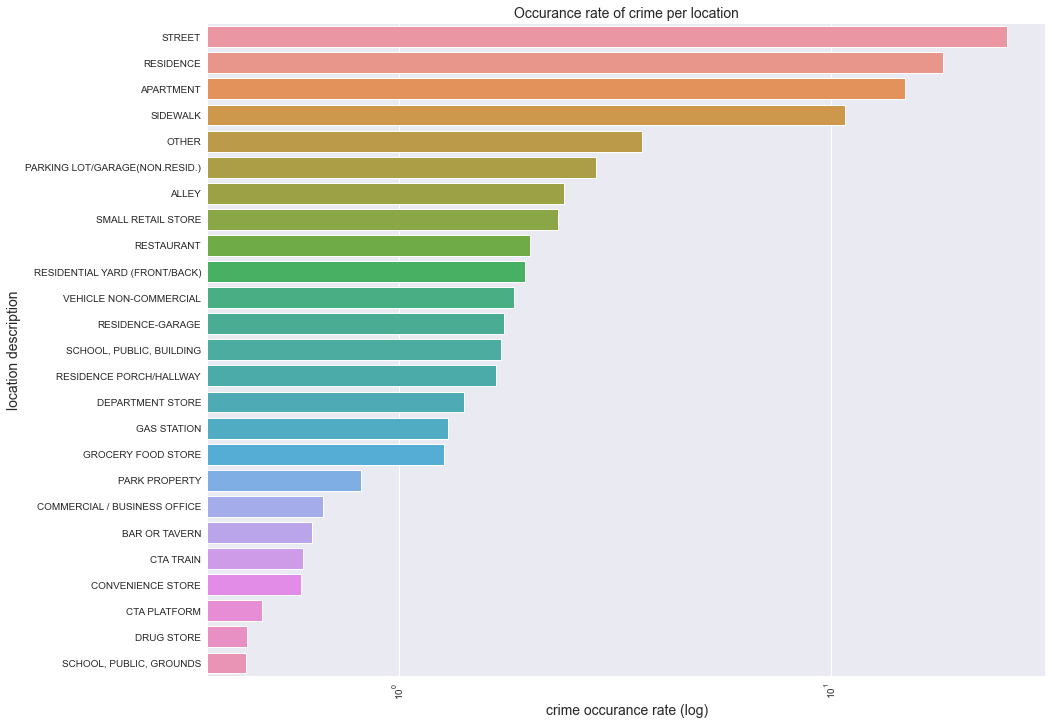

In [14]:
plt.subplots(figsize=(15,12))
sns.set(style='whitegrid')
ax = sns.barplot(y='location_description',x='crime occurance rate',data=location).set_title("Occurance rate of crime per location",fontsize=14)
plt.xticks(rotation=90)
plt.xscale('log')
plt.xlabel('crime occurance rate (log)', fontsize=14)
plt.ylabel('location description', fontsize=14)

#### Plotting with respect to percentage

Text(0, 0.5, 'Occurrence rate (%)')

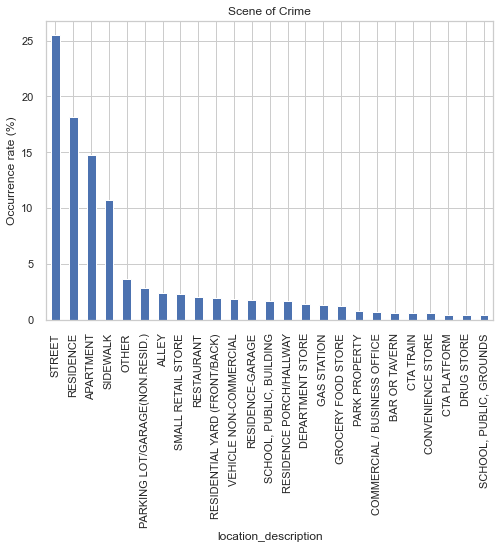

In [15]:

locationgb.sort_values(ascending=False, inplace=True)
locationgb.plot(kind='bar',title="Scene of Crime")
plt.ylabel('Occurrence rate (%)')

### Occurance rate of crime type

In [16]:
datagb_crime=df.groupby("primary_type")["primary_type"].count()
datagb_crime.sort_values(ascending=False, inplace=True)
datagb_crime.head(50)

primary_type
THEFT                                654866
BATTERY                              579432
CRIMINAL DAMAGE                      343388
NARCOTICS                            250368
ASSAULT                              213568
OTHER OFFENSE                        196543
BURGLARY                             174797
MOTOR VEHICLE THEFT                  145055
DECEPTIVE PRACTICE                   144793
ROBBERY                              121224
CRIMINAL TRESPASS                     64804
WEAPONS VIOLATION                     55524
OFFENSE INVOLVING CHILDREN            25033
PUBLIC PEACE VIOLATION                23745
PROSTITUTION                          13256
INTERFERENCE WITH PUBLIC OFFICER      12210
CRIM SEXUAL ASSAULT                   11409
SEX OFFENSE                           10415
ARSON                                  5040
HOMICIDE                               4940
GAMBLING                               4133
LIQUOR LAW VIOLATION                   3380
CRIMINAL SEXUAL ASS

In [17]:
crime_list=datagb_crime.index.values[0:25].tolist()
df=df[df["primary_type"].isin(crime_list)]


In [18]:
crime_listgb=df.groupby('primary_type').size()/len(df)*100
crime_type = crime_listgb.reset_index(name="crime occurance rate").sort_values(by='crime occurance rate',ascending=False).head(50)
crime_type

,primary_type,crime occurance rate
23,THEFT,21.364683
2,BATTERY,18.903686
5,CRIMINAL DAMAGE,11.202866
15,NARCOTICS,8.168134
1,ASSAULT,6.967552
17,OTHER OFFENSE,6.412119
3,BURGLARY,5.702667
14,MOTOR VEHICLE THEFT,4.732349
8,DECEPTIVE PRACTICE,4.723801
20,ROBBERY,3.954874


#### Plotting with respect to percentage

Text(0, 0.5, 'Occurrence rate (%)')

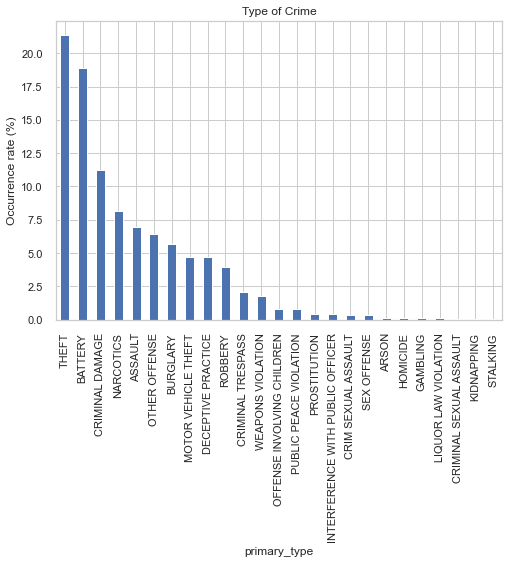

In [19]:
crime_listgb.sort_values(ascending=False, inplace=True)
crime_listgb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

### Frequency of Crimes Per Year in Chicago

In [20]:
crime_year_gb=df.groupby('Year').size()/len(df)*100
crime_year = crime_year_gb.reset_index(name="crime occurance rate").sort_values(by='Year',ascending=True).head(50)
crime_year

,Year,crime occurance rate
0,2010,11.140520
1,2011,10.598595
2,2012,10.043097
3,2013,9.128828
4,2014,8.240299
5,2015,7.792789
6,2016,8.086214
7,2017,8.014929
8,2018,7.934085
9,2019,7.708487


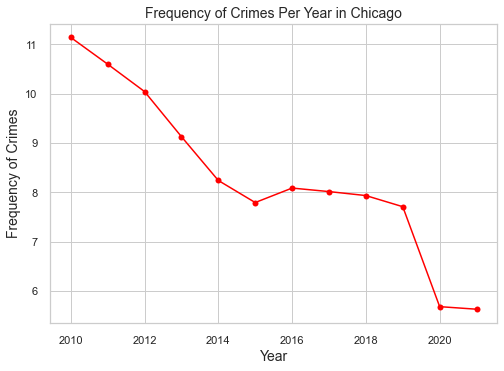

In [21]:
plt.plot(crime_year['Year'], crime_year['crime occurance rate'], color='red', marker='o')
plt.title('Frequency of Crimes Per Year in Chicago', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency of Crimes', fontsize=14)
plt.grid(True)
plt.show()

### Crimes occured in each hour

In [22]:
timegb=(df.groupby('Hour').size()/len(df))*100
t = timegb.reset_index(name="crime_occurance_rate").head(50)
t

,Hour,crime_occurance_rate
0,0,5.678264
1,1,5.664463
2,2,5.461669
3,3,5.303049
4,4,4.608441
5,5,4.790388
6,6,3.803627
7,7,2.759283
8,8,2.302377
9,9,1.810497


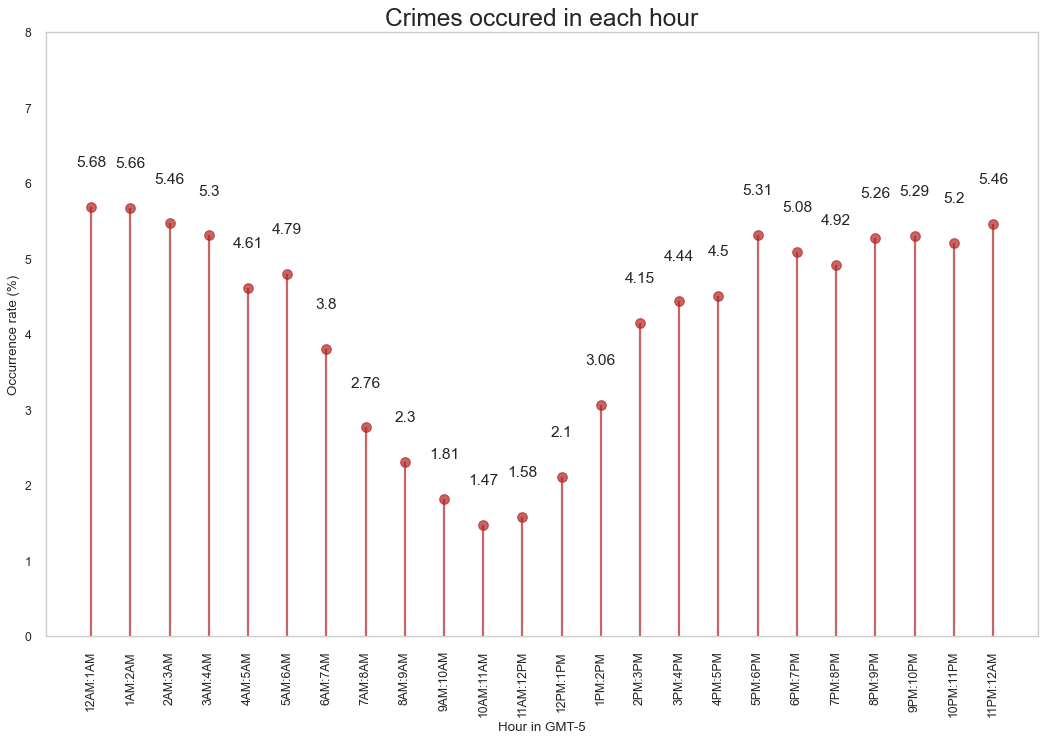

In [23]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=t.Hour, ymin=0, ymax=t.crime_occurance_rate, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=t.Hour, y=t.crime_occurance_rate, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Crimes occured in each hour', fontdict={'size':22})
ax.set_ylabel('Occurrence rate (%)')
ax.set_xlabel('Hour in GMT-5')
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ['12AM:1AM', '1AM:2AM', '2AM:3AM','3AM:4AM','4AM:5AM','5AM:6AM','6AM:7AM','7AM:8AM','8AM:9AM','9AM:10AM','10AM:11AM','11AM:12PM','12PM:1PM','1PM:2PM','2PM:3PM','3PM:4PM','4PM:5PM','5PM:6PM','6PM:7PM','7PM:8PM','8PM:9PM','9PM:10PM','10PM:11PM','11PM:12AM'],rotation=90)
ax.set_ylim(0, 8)
ax.grid(False)

# Annotate
for row in t.itertuples():
    ax.text(row.Hour, row.crime_occurance_rate+.5, s=round(row.crime_occurance_rate, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### Crime occured day of week

In [24]:
daygb=df.groupby(['DayOfWeek'])["DayOfWeek"].count()/len(df)*100
print(daygb)

DayOfWeek
1    14.300694
2    14.169086
3    14.064296
4    14.227680
5    14.113233
6    14.480553
7    14.644458
Name: DayOfWeek, dtype: float64


([<matplotlib.axis.XTick at 0x23461e896a0>,
 [Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday'),
  Text(7, 0, 'Sunday')])

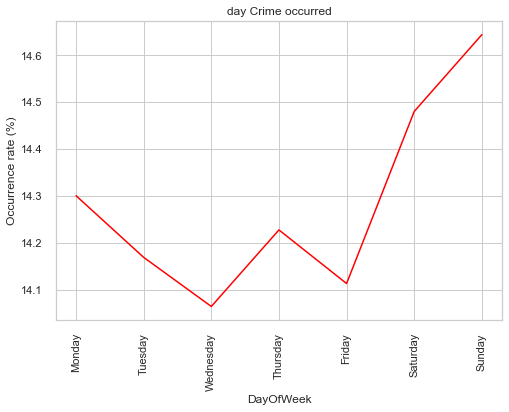

In [25]:
daygb.plot(kind='line',title="day Crime occurred", color = 'red')
plt.ylabel('Occurrence rate (%)')
plt.xticks([1, 2,3,4,5,6,7], ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=90)

### Crimes occured in each month

In [26]:
month_group=df.groupby(['Month'])['Month'].count()/len(df)*100
m = month_group.reset_index(name="crime occurance rate").head(50)
m

,Month,crime occurance rate
0,1,7.900515
1,2,6.892417
2,3,8.167644
3,4,8.025434
4,5,8.935625
5,6,8.990337
6,7,9.334134
7,8,9.207420
8,9,8.594503
9,10,8.555060


Text(0, 0.5, 'Occurrence rate (%)')

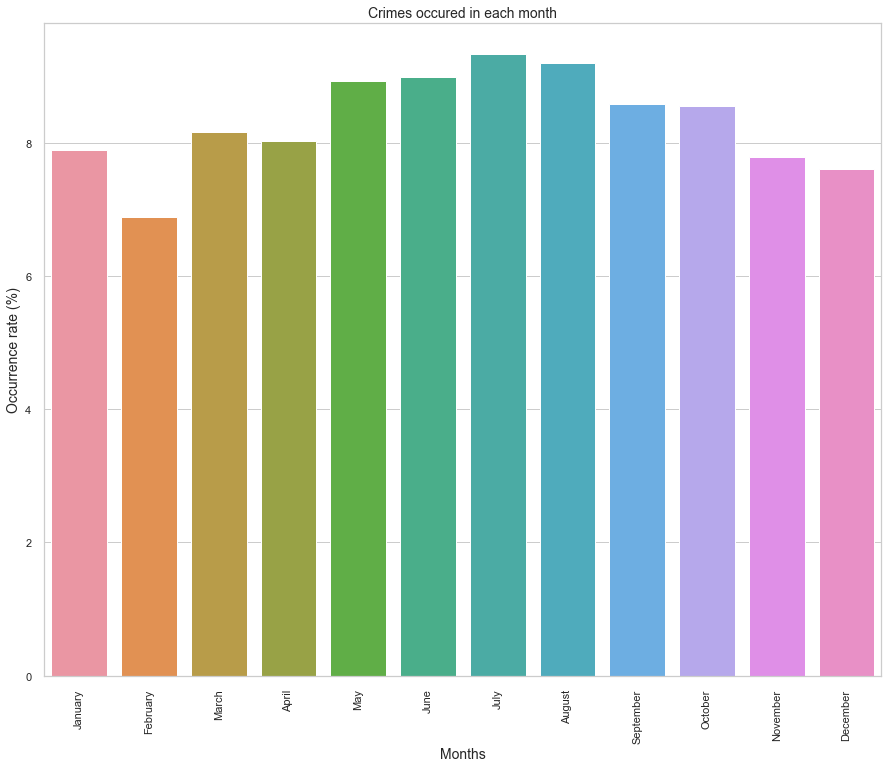

In [27]:
plt.subplots(figsize=(15,12))
sns.set(style='whitegrid')
ax = sns.barplot(y='crime occurance rate',x='Month',data=m).set_title("Crimes occured in each month",fontsize=14)
plt.xticks([0,1, 2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'],rotation=90)

plt.xlabel('Months', fontsize=14)
plt.ylabel('Occurrence rate (%)', fontsize=14)

## Plotting Spatial Data with respect to crime

In [33]:
lo=df.groupby(['latitude','longitude','community_area{decimal}']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [34]:
#Assigning color with respect to the count of crimes
lo['color']=lo['count'].apply(lambda count:"Black" if count>=4000 else
                                         "green" if count>=3000 and count<4000 else
                                         "Orange" if count>=2000 and count<3000 else
                                         "darkblue" if count>=1000 and count<2000 else
                                         "red" if count>=500 and count<1000 else
                                         "grey")
                                        
#Assigning size to a a particular count of crimes
lo['size']=lo['count'].apply(lambda count:10 if count>=4000 else
                                         8 if count>=3000 and count<4000 else
                                         6 if count>=2000 and count<3000 else
                                         4 if count>=1000 and count<2000 else
                                         2 if count>=500 and count<1000 else
                                         0.1)

In [36]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [37]:
import folium
from folium import plugins
#using folium plotting the crimes in Chicago city
m=folium.Map([41.811108933,-87.688007507],zoom_start=11)
#location=location[0:2000]
for lat,lon,area,color,count,size in zip(lo['latitude'],lo['longitude'],lo['community_area{decimal}'],lo['color'],lo['count'],lo['size']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)

In [38]:
m

In [39]:
m.save('chicago_crime.html')

In [ ]:
# convert to (n, 2) nd-array format for heatmap
location1=lo[0:100]
location_data = lo[['latitude', 'longitude']].to_numpy()

# plot heatmap
m.add_child(plugins.HeatMap(location_data, radius=15))
m.save('heatmap.html')

### Given the difficulties encountered in using Primary Type directly for our models, we decided to make Hand Engineering a new attribute that would be more balanced and more representative of crimes.

### we found that we could put these types of crimes into 3 major categories:

### Offenses directed against the person (ODATP)
### Offenses directed against property (ODAP)
### Offenses affecting public health, safety and decency/affecting governmental functions (OAPHSD)
### We have put these types of crimes into each of the categories as follows:


In [28]:
print("Number of crimes in the category 'Offenses directed against the person' :",len(df[df['primary_type'].isin(["BATTERY", "ASSAULT", "OFFENSE INVOLVING CHILDREN", "SEX OFFENSE", "HOMICIDE",
"CRIM SEXUAL ASSAULT", "PROSTITUTION", "STALKING", "KIDNAPPING","INTIMIDATION","CRIMINAL SEXUAL ASSAULT", "HUMAN TRAFFICKING"])]))

Number of crimes in the category 'Offenses directed against the person' : 865310


In [24]:
print("Number of crimes in the category 'Offenses directed against property' :",len(df[df['primary_type'].isin(["THEFT", "DECEPTIVE PRACTICE", "BURGLARY", "MOTOR VEHICLE THEFT", "ROBBERY","ARSON"])]))

Number of crimes in the category 'Offenses directed against property' : 1255477


In [25]:
print("Number of crimes in the category 'Offenses affecting public health, safety and decency/affecting governmental functions' :",
len(df[df['primary_type'].isin(["NARCOTICS", "WEAPONS VIOLATION", "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION","CONCEALED CARRY LICENSE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER","GAMBLING", "OBSCENITY", "PUBLIC INDECENCY", "OTHER NARCOTIC VIOLATION"])]))

Number of crimes in the category 'Offenses affecting public health, safety and decency/affecting governmental functions' : 351279


In [26]:
print("Number of crimes in the category 'Other Offenses' :",len(df[df['primary_type'].isin(["CRIMINAL DAMAGE", "OTHER OFFENSE", "CRIMINAL TRESPASS", "NON-CRIMINAL", "NON-CRIMINAL (SUBJECT SPECIFIED)","RITUALISM"])]))

Number of crimes in the category 'Other Offenses' : 596575


In [27]:
df.insert(1, "Category", -1)

In [28]:
df.loc[df['primary_type'].isin(["BATTERY", "ASSAULT", "OFFENSE INVOLVING CHILDREN", "SEX OFFENSE", "HOMICIDE","CRIM SEXUAL ASSAULT", "CRIMINAL SEXUAL ASSAULT", "PROSTITUTION", "STALKING", "KIDNAPPING","INTIMIDATION", "HUMAN TRAFFICKING"]), 'Category'] = 0

In [29]:
df.loc[df['primary_type'].isin(["THEFT", "DECEPTIVE PRACTICE", "BURGLARY", "MOTOR VEHICLE THEFT", "ROBBERY","ARSON"]), 'Category'] = 1

In [30]:
df.loc[df['primary_type'].isin(["NARCOTICS", "WEAPONS VIOLATION", "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION","CONCEALED CARRY LICENSE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER", "GAMBLING", "OBSCENITY","PUBLIC INDECENCY", "OTHER NARCOTIC VIOLATION"]), 'Category'] = 2

In [31]:
df.loc[df['primary_type'].isin(["CRIMINAL DAMAGE", "OTHER OFFENSE", "CRIMINAL TRESPASS", "NON-CRIMINAL", "NON-CRIMINAL (SUBJECT SPECIFIED)","RITUALISM"]), 'Category'] = 3

In [32]:
df['arrest'] = df['arrest'].map({'t': 1, 'f': 0})
df['domestic'] = df['domestic'].map({'t': 1, 'f': 0})

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df['location_description'] = enc.fit_transform(df[['location_description']])

df.sample(frac=1)

,id,Category,case_number,date,block,iucr,primary_type,description,location_description,arrest,...,Minute,Second,EpochSecond,JulianDate,DayOfYear,DayOfWeek,NamedDayOfWeek,NamedMonth,AlignedWeekOfYear,UnalignedWeekOfYear
844150,12495420,1,JE389334,2021-09-27T21:00:00.000Z,001XX S OAKLEY BLVD,0810,THEFT,OVER $500,1.0,0,...,0,0,1632776400,2.459486e+06,270,2,Monday,September,39,39
418496,7774121,1,HS581709,2010-10-24T00:00:00.000Z,015XX W SUNNYSIDE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,23.0,0,...,0,0,1287878400,2.455494e+06,297,1,Sunday,October,42,43
2460024,8120937,0,HT355081,2011-06-19T14:00:00.000Z,024XX S MILLARD AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,21.0,0,...,0,0,1308492000,2.455733e+06,170,1,Sunday,June,24,25
2281364,9625499,3,HX275830,2014-05-25T17:15:00.000Z,054XX S LAFLIN ST,4625,OTHER OFFENSE,PAROLE VIOLATION,21.0,1,...,15,0,1401038100,2.456804e+06,145,1,Sunday,May,21,21
1508291,7400166,3,HS199061,2010-03-08T20:00:00.000Z,053XX S OAK PARK AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,24.0,0,...,0,0,1268078400,2.455265e+06,67,2,Monday,March,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212107,11743949,2,JC332193,2019-07-02T23:51:00.000Z,041XX S STATE ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,12.0,1,...,51,0,1562111460,2.458668e+06,183,3,Tuesday,July,27,27
2738441,11065218,0,JA403752,2017-08-24T01:00:00.000Z,023XX W GARFIELD BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,1.0,0,...,0,0,1503536400,2.457990e+06,236,5,Thursday,August,34,34
1746900,11908668,1,JC531553,2019-12-02T01:15:00.000Z,036XX W WOLFRAM ST,0820,THEFT,$500 AND UNDER,23.0,0,...,15,0,1575249300,2.458820e+06,336,2,Monday,December,49,48
2927874,8480850,3,HV157509,2011-08-01T05:00:00.000Z,006XX N CENTRAL PARK AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,1.0,0,...,0,0,1312174800,2.455775e+06,213,2,Monday,August,31,31


In [34]:
df.dtypes

id                        int64
Category                  int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description    float64
arrest                    int64
domestic                  int64
beat                     object
district                 object
ward                     object
community_area          float64
fbi_code                 object
x_coordinate              int64
y_coordinate              int64
year_s                    int64
updated_on               object
latitude                float64
longitude               float64
location                 object
Date                     object
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
Minute                    int64
Second                    int64
EpochSecond               int64
JulianDa

### Spliting Dataset into test and train

In [35]:
X = df[['location_description','domestic','Hour','Year','Day','Category','Distance_in_Meters{decimal}']]

In [36]:
y = df['arrest']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

In [40]:
param_grid = {'n_neighbors':[13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}
score = 'f1_weighted'

In [41]:
knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5,
verbose = 1,scoring = score)

In [ ]:
clf_results = knn_grid.fit(X_train,y_train)
predicted = knn_grid.predict(X_test)
accRF=accuracy_score(y_test, predicted.round())*100
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")
print("Best parameters : {}".format(knn_grid.best_params_))
print("Best cross-validation score for KNN : {:.2f}".format(knn_grid.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
for mean, std, params in zip(
        knn_grid.cv_results_['mean_test_score'], 
        knn_grid.cv_results_['std_test_score'], 
        knn_grid.cv_results_['params']           
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
 'n_estimators': [20,40,60,80,100],
 'max_depth': [20,40,60,80,100]
 }
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                               param_distributions = random_grid,
                               n_iter=50,
                               cv=5,
                               verbose=2,
                               random_state=1,
                               scoring='f1_weighted',
                               n_jobs=-1)
rf_random.fit(X_train,y_train)
predicted = rf_random.predict(X_test)
accRF=accuracy_score(y_test, predicted.round())*100
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print("Best parameters : {}".format(rf_random.best_params_))
print("Best cross-validation score : {:.2f}".format(rf_random.best_score_))

In [ ]:
for mean, std, params in zip(
        rf_random.cv_results_['mean_test_score'],
        rf_random.cv_results_['std_test_score'],  
        rf_random.cv_results_['params']           
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
